# SWMT PanAntarctic comparison

In [1]:
import intake
import glob

import dask.distributed
import gsw
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [2]:
#Starting a dask client
from os import environ
environ["PYTHONWARNINGS"] = "ignore"

from dask.distributed import Client
client = Client(threads_per_worker = 1)

## Time series

### Importing the data

In [3]:
pan01_anom = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf_rho0/plots/swmt_shelf_time_pan01_anom.nc', chunks = 'auto') 
pan005_anom = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan005_SWMT_shelf_rho0/plots/swmt_shelf_time_pan005_anom.nc', chunks = 'auto')

In [4]:
pan01_anom_new = pan01_anom.to_series()
pan005_anom_new = pan005_anom.to_series()

In [5]:
pan01_C = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf_rho0/plots/swmt_shelf_time_pan01_C.nc', chunks = 'auto') 
pan01_M = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf_rho0/plots/swmt_shelf_time_pan01_M.nc', chunks = 'auto') 
pan005_C = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan005_SWMT_shelf_rho0/plots/swmt_shelf_time_pan005_C.nc', chunks = 'auto')
pan005_M = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan005_SWMT_shelf_rho0/plots/swmt_shelf_time_pan005_M.nc', chunks = 'auto')

In [6]:
pan01_C = pan01_C.to_series()
pan01_M = pan01_M.to_series()
pan005_C = pan005_C.to_series()
pan005_M = pan005_M.to_series()

### Plotting

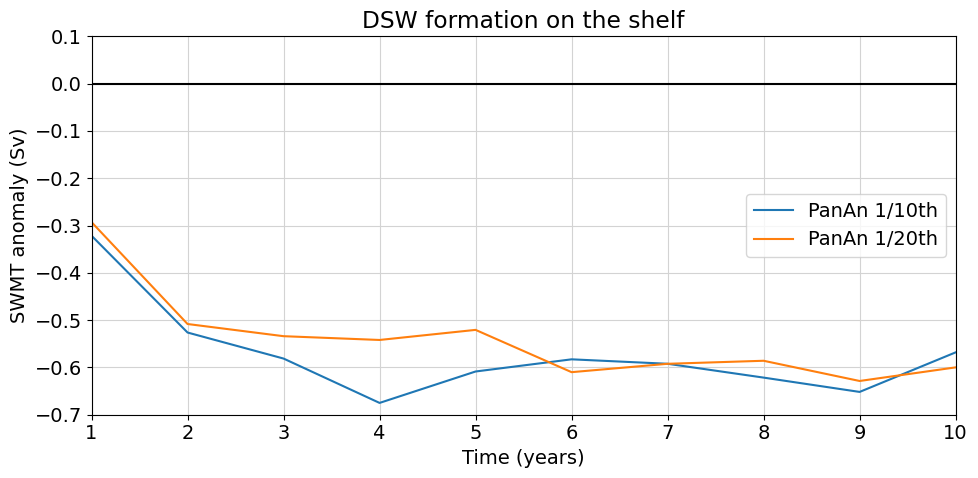

In [7]:
plt.rcParams['font.size'] = 14

# Note, the '+1' is to make the data go from 1-10 instead of 0-9. 
plt.figure(figsize=(10, 5))
plt.plot(pan01_anom_new.index + 1, pan01_anom_new.values, label='PanAn 1/10th')
plt.plot(pan005_anom_new.index + 1, pan005_anom_new.values, label='PanAn 1/20th')

# Labeling and formatting
plt.xlim(1, 10)
plt.ylim(-0.7,0.1)
plt.xlabel('Time (years)')
plt.ylabel("SWMT anomaly (Sv)")
plt.title('DSW formation on the shelf')
plt.legend()
plt.grid(True, color='lightgrey')
plt.axhline(y=0, color='black', linestyle='-')
plt.tight_layout()
plt.show()

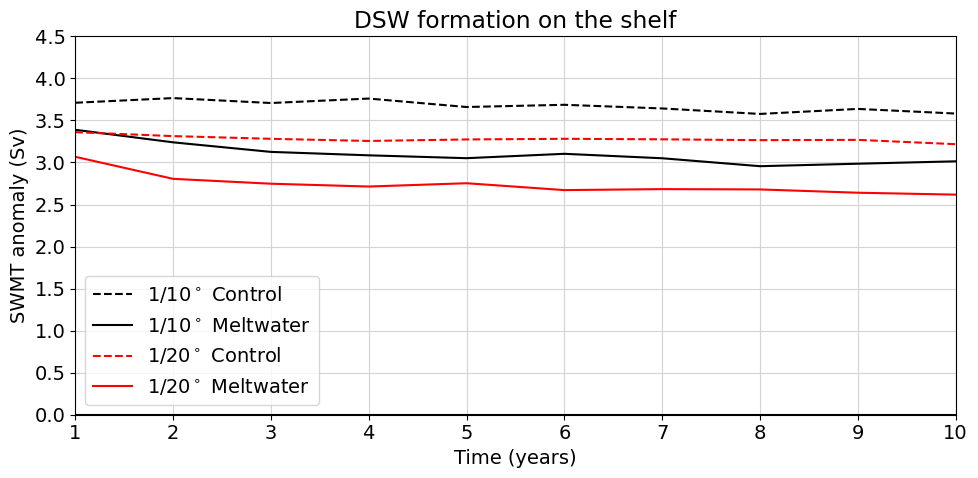

In [14]:
plt.rcParams['font.size'] = 14

# Note, the '+1' is to make the data go from 1-10 instead of 0-9. 
plt.figure(figsize=(10, 5))
plt.plot(pan01_C.index + 1, pan01_C.values, color='black', linestyle='--', label='1/10$^\circ$ Control')
plt.plot(pan01_M.index + 1, pan01_M.values, color='black', linestyle='-', label='1/10$^\circ$ Meltwater')
plt.plot(pan005_C.index + 1, pan005_C.values, color='red', linestyle='--', label='1/20$^\circ$ Control')
plt.plot(pan005_M.index + 1, pan005_M.values, color='red', linestyle='-', label='1/20$^\circ$ Meltwater')

# Labeling and formatting
plt.xlim(1, 10)
plt.ylim(0,4.5)
plt.xlabel('Time (years)')
plt.ylabel("SWMT anomaly (Sv)")
plt.title('DSW formation on the shelf')
plt.legend()
plt.grid(True, color='lightgrey')
plt.axhline(y=0, color='black', linestyle='-')
plt.tight_layout()
plt.show()

## Isopycnal bins plot

In [5]:
pan01_C = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf_rho0/plots/swmt_shelf_sum_ave_rho0_C_pan01.nc', chunks = 'auto') 
pan01_M = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf_rho0/plots/swmt_shelf_sum_ave_rho0_M_pan01.nc', chunks = 'auto') 
pan005_C = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan005_SWMT_shelf_rho0/plots/swmt_shelf_sum_ave_C_pan005.nc', chunks = 'auto') 
pan005_M = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan005_SWMT_shelf_rho0/plots/swmt_shelf_sum_ave_M_pan005.nc', chunks = 'auto') 
#acc_C = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_ACCESS_SWMT_shelf/timeseries/swmt_shelf_sum_ave_C_access.nc', chunks = 'auto') 
#acc_M = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_ACCESS_SWMT_shelf/timeseries/swmt_shelf_sum_ave_M_access.nc', chunks = 'auto') 

In [6]:
pan01_25 = 27.89
pan01_75 = 27.73 

''

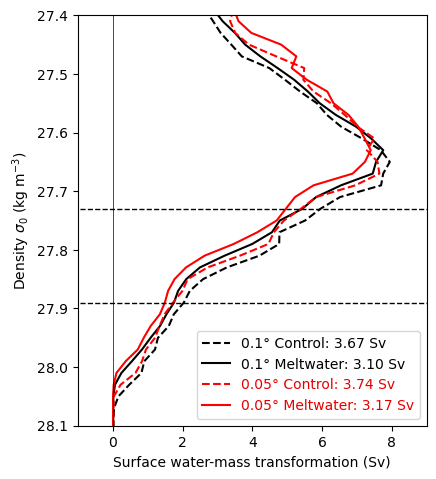

In [52]:
fig, ax1 = plt.subplots(figsize=(4.5, 5.33))

ax1.plot(pan01_C, pan01_C['isopycnal_bins'], linestyle='--', color = 'black', label='0.1° Control: 3.67 Sv')
ax1.plot(pan01_M, pan01_M['isopycnal_bins'], 'black', label='0.1° Meltwater: 3.10 Sv')
ax1.plot(pan005_C, pan005_C['isopycnal_bins'], linestyle='--',color='red', label='0.05° Control: 3.74 Sv')
ax1.plot(pan005_M, pan005_M['isopycnal_bins'], 'red', label='0.05° Meltwater: 3.17 Sv')

ax1.plot([0, 0], [27.4, 28.1], 'k', linewidth=0.5)
ax1.plot([-5, 15], [pan01_25, pan01_25], 'k--', linewidth=1)
ax1.plot([-5, 15], [pan01_75, pan01_75], 'k--', linewidth=1)

leg = plt.legend()
# Access the text objects in the legend
for text, color in zip(leg.get_texts(), ['black', 'black','#E50000','#E50000']):
    text.set_color(color)

ax1.set_ylim((28.1, 27.4))
ax1.set_xlim((-1, 9))
ax1.yaxis.set_label_position("left")
ax1.yaxis.tick_left()
ax1.set_ylabel('Density $\sigma_0$ (kg m$^{-3}$)')
ax1.set_xlabel('Surface water-mass transformation (Sv)')
;

Need to play around with best presentation a bit.

''

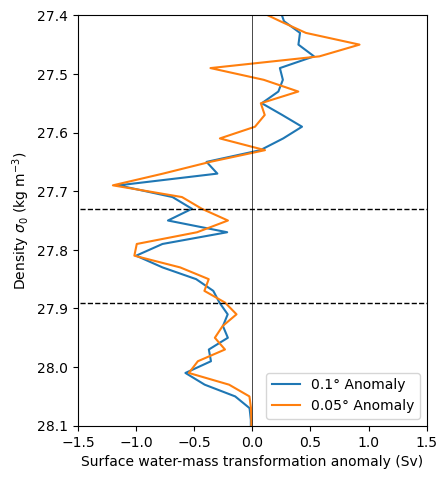

In [53]:
fig, ax1 = plt.subplots(figsize=(4.5, 5.33))

ax1.plot((pan01_M-pan01_C), (pan01_M-pan01_C)['isopycnal_bins'], label='0.1° Anomaly')
ax1.plot((pan005_M-pan005_C), (pan005_M-pan005_C)['isopycnal_bins'], label='0.05° Anomaly')

ax1.plot([0, 0], [27.4, 28.1], 'k', linewidth=0.5)
ax1.plot([-5, 15], [pan01_25, pan01_25], 'k--', linewidth=1)
ax1.plot([-5, 15], [pan01_75, pan01_75], 'k--', linewidth=1)

leg = plt.legend()
# Access the text objects in the legend
for text, color in zip(leg.get_texts(), ['black', 'black','#E50000','#E50000']):
    text.set_color(color)

ax1.set_ylim((28.1, 27.4))
ax1.set_xlim((-1.5,1.5))
ax1.yaxis.set_label_position("left")
ax1.yaxis.tick_left()
ax1.set_ylabel('Density $\sigma_0$ (kg m$^{-3}$)')
ax1.set_xlabel('Surface water-mass transformation anomaly (Sv)')
;